In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

In [17]:


# Crear dataset blobs con 4 clusters
X, y_true = make_blobs(n_samples=300, 
                       centers=4, 
                       cluster_std=0.8, 
                       random_state=42,
                       n_features=2)

# Crear DataFrame
blobs_df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
blobs_df['True_Cluster'] = y_true



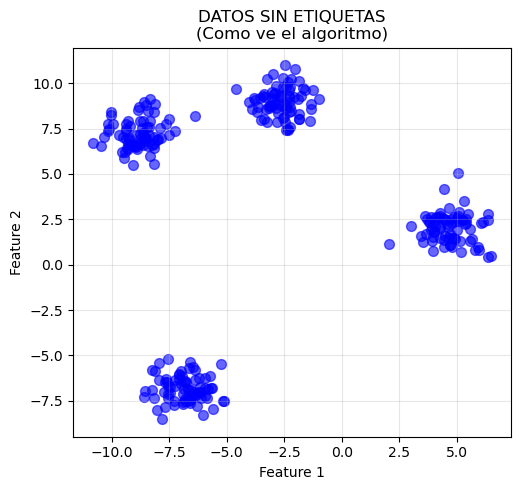

In [18]:
plt.figure(figsize=(15, 5))


# Gráfica 2: Datos sin etiquetas (como los vería el algoritmo)
plt.subplot(1, 3, 2)
plt.scatter(blobs_df['Feature_1'], blobs_df['Feature_2'], 
           alpha=0.6, color='blue', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DATOS SIN ETIQUETAS\n(Como ve el algoritmo)')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()



🌳 ANÁLISIS DEL DENDROGRAMA


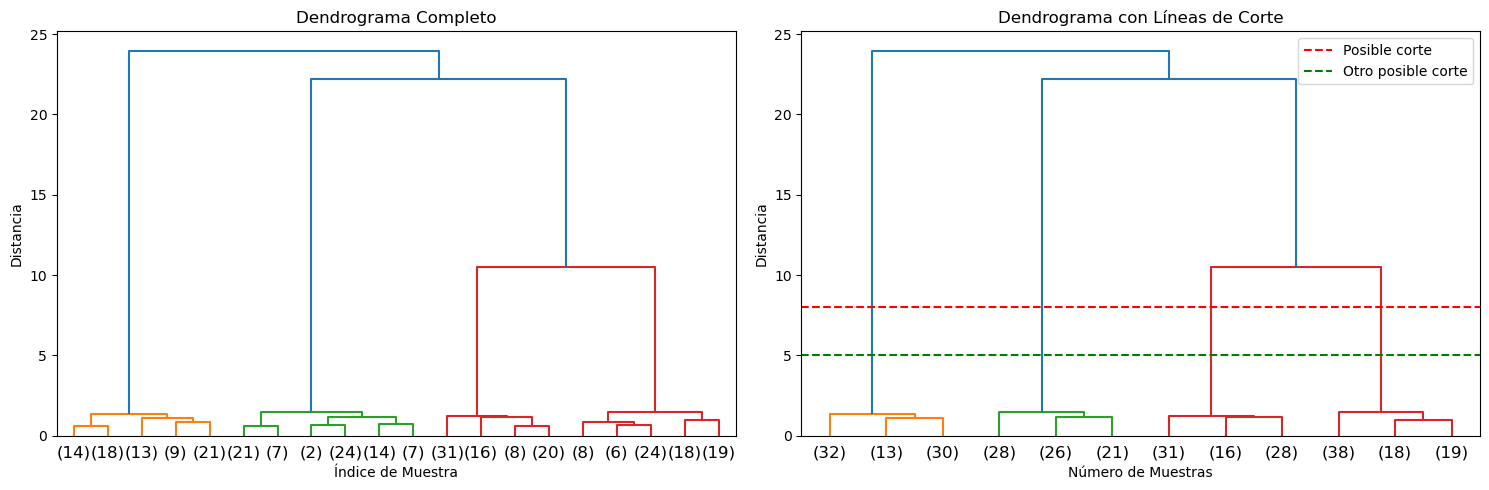

In [22]:
print("\n" + "="*60)
print("🌳 ANÁLISIS DEL DENDROGRAMA")
print("="*60)

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear dendrograma
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
Z = linkage(X_scaled, method='ward')
dendrogram(Z, orientation='top', truncate_mode='lastp', p=20)
plt.title('Dendrograma Completo')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')

plt.subplot(1, 2, 2)
dendrogram(Z, orientation='top', truncate_mode='lastp', p=12)
plt.axhline(y=8, color='r', linestyle='--', label='Posible corte')
plt.axhline(y=5, color='g', linestyle='--', label='Otro posible corte')
plt.title('Dendrograma con Líneas de Corte')
plt.xlabel('Número de Muestras')
plt.ylabel('Distancia')
plt.legend()

plt.tight_layout()
plt.show()


🔬 EXPERIMENTO 1: Agglomerative Clustering con k=4


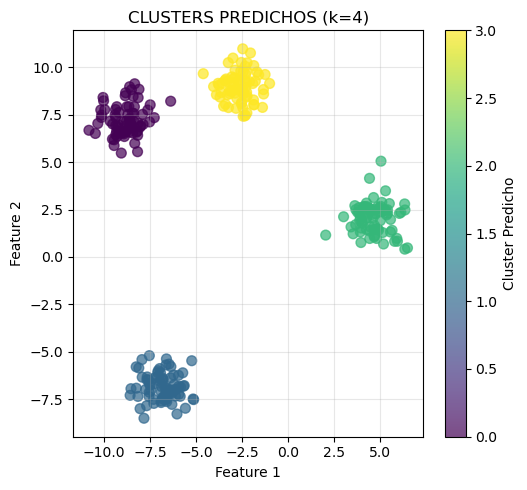

In [24]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 1: Agglomerative Clustering con k=4")
print("="*60)

# Aplicar Agglomerative Clustering con 4 clusters (sabemos la verdad)
agg_model_4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_pred_4 = agg_model_4.fit_predict(X_scaled)

# Visualización comparativa
plt.figure(figsize=(15, 5))


# Gráfica 2: Clusters predichos
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(blobs_df['Feature_1'], blobs_df['Feature_2'], 
                      c=y_pred_4, cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter2, label='Cluster Predicho')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('CLUSTERS PREDICHOS (k=4)')
plt.grid(True, alpha=0.3)




plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métricas para k=4
silhouette_4 = silhouette_score(X_scaled, y_pred_4)
calinski_4 = calinski_harabasz_score(X_scaled, y_pred_4)



🔬 EXPERIMENTO 2: Búsqueda del K óptimo


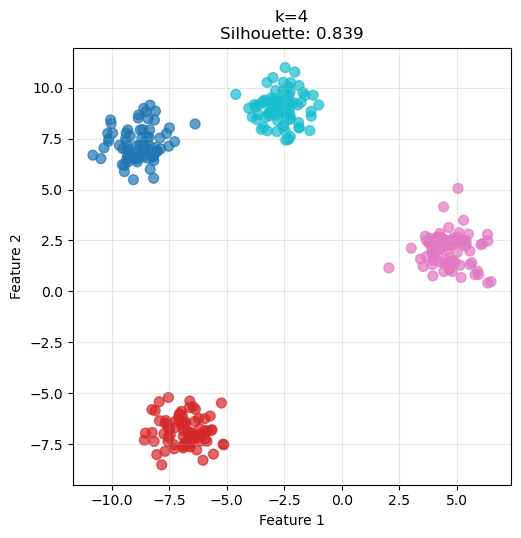

<Figure size 640x480 with 0 Axes>

In [28]:

print("\n" + "="*60)
print("🔬 EXPERIMENTO 2: Búsqueda del K óptimo")
print("="*60)

# Probar diferentes valores de k
k_range = range(2, 8)
silhouette_scores = []
calinski_scores = []

plt.figure(figsize=(15, 10))

# Determinar mejor k automáticamente
best_silhouette = -1
best_k = 2

for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k
        
agg_model = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
y_pred = agg_model.fit_predict(X_scaled)
    
# Calcular métricas
silhouette = silhouette_score(X_scaled, y_pred)
calinski = calinski_harabasz_score(X_scaled, y_pred)
    
silhouette_scores.append(silhouette)
calinski_scores.append(calinski)

# Gráfica de resultados
plt.subplot(2, 3, i+1)
scatter = plt.scatter(blobs_df['Feature_1'], blobs_df['Feature_2'], 
                         c=y_pred, cmap='tab10', alpha=0.7, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k={best_k}\nSilhouette: {silhouette:.3f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()





plt.tight_layout()
plt.show()